In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('/Users/bhushan/Desktop/venv/Chennai Water Quality 02/Data/output.csv')
print(data)

      D.O. mg/L    pH  Conductivity m mhos/cm  BOD at 27C mg/L  Nitrate mg/L  \
0      7.800000  7.50                   482.0              3.0         0.150   
1      5.900000  7.77                   521.0              2.7         0.086   
2      6.700000  8.00                   670.0              2.0         0.054   
3      7.900000  7.46                   540.0              2.0         0.150   
4      6.900000  7.47                   558.0              2.0         0.150   
...         ...   ...                     ...              ...           ...   
1398   6.382156  7.80                   288.0             12.0         0.170   
1399   6.700000  8.20                   723.0              2.0         1.000   
1400   6.500000  8.20                   420.0              2.0         1.000   
1401   6.500000  8.20                   884.0              2.0         1.000   
1402   6.400000  8.30                 40330.0              2.0         1.000   

      Nitrite mg/L  Total Coliform MPN/

In [3]:
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1403 entries, 0 to 1402
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   D.O. mg/L                       1403 non-null   float64
 1   pH                              1403 non-null   float64
 2   Conductivity m mhos/cm          1403 non-null   float64
 3   BOD at 27C mg/L                 1403 non-null   float64
 4   Nitrate mg/L                    1403 non-null   float64
 5   Nitrite mg/L                    1403 non-null   float64
 6   Total Coliform MPN/100ml        1403 non-null   float64
 7   Turbidity NTU                   1403 non-null   float64
 8   Phenophthaline Alkalinity mg/L  1403 non-null   float64
 9   Total Alkalinity mg/L           1403 non-null   float64
 10  COD mg/L                        1403 non-null   float64
 11  Total Kjeldahl Nitrogen mg/L    1403 non-null   float64
 12  Ammonia-N as N mg/L             14

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Accuracy: 62.00%
Classification Report:
              precision    recall  f1-score   support

           A       0.56      0.76      0.65       111
           B       0.72      0.45      0.55       181
           C       0.15      0.58      0.24        19
          DE       0.96      0.77      0.85       110

    accuracy                           0.62       421
   macro avg       0.60      0.64      0.57       421
weighted avg       0.72      0.62      0.64       421



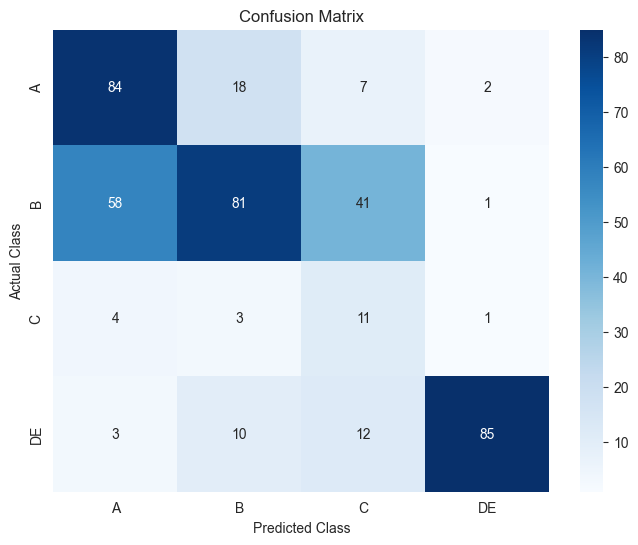

In [8]:
X = data.drop(columns=['DBU Class'])
y = data['DBU Class']

#Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

svc = SVC(kernel='linear', class_weight='balanced')
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=svc.classes_, yticklabels=svc.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

Classification Report with RBF Kernel:
              precision    recall  f1-score   support

           A       0.53      0.67      0.59       111
           B       0.70      0.52      0.60       181
           C       0.20      0.63      0.30        19
          DE       0.81      0.63      0.71       110

    accuracy                           0.59       421
   macro avg       0.56      0.61      0.55       421
weighted avg       0.66      0.59      0.61       421

Accuracy with RBF Kernel: 59.38%


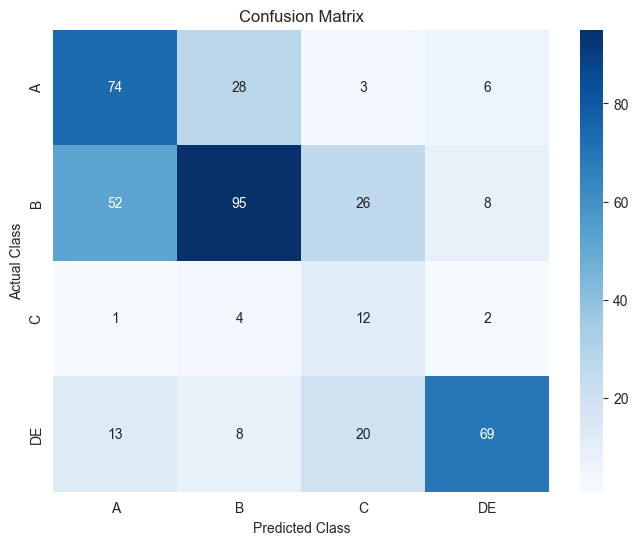

In [9]:
svc_rbf = SVC(kernel='rbf', class_weight='balanced')
svc_rbf.fit(X_train, y_train)

y_pred_rbf = svc_rbf.predict(X_test)
print("Classification Report with RBF Kernel:")
print(classification_report(y_test, y_pred_rbf, zero_division=1))

accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"Accuracy with RBF Kernel: {accuracy_rbf * 100:.2f}%")

conf_matrix = confusion_matrix(y_test, y_pred_rbf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=svc.classes_, yticklabels=svc.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()
